In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('glass.csv')
var_names = list(df.columns) #получение имен признаков
labels = df.to_numpy('int')[:,-1] #метки классов
data = df.to_numpy('float')[:,:-1] #описательные признаки
print(df)
print(labels)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 

In [4]:
from sklearn import preprocessing
data = preprocessing.minmax_scale(data)


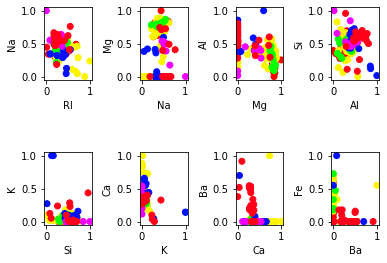

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,4)
plt.subplots_adjust(wspace=1, hspace=1) 

for i in range(data.shape[1]-1):
    
    scatter=axs[i // 4, i % 4].scatter(data[:,i],data[:,(i+1)],c=labels,cmap='hsv')
    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i+1])
    #legend1=axs[i // 4, i % 4].legend(*scatter.legend_elements(), loc="lower center") 
    #axs[i // 4, i % 4].add_artist(legend1)   

plt.show()



Cоответствие цвета на диаграмме и класса в датасете:
1-красный; 2-желтый; 3-зеленый; 5-синий; 6-розовый; 7-красный

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca_data = pca.fit(data).transform(data)
print(pca_data)

[[-4.02106406e-01  3.27066975e-02 -1.67050356e-01  1.92195203e-01]
 [-2.06319788e-01 -1.44705307e-01 -8.19230734e-02  2.05493779e-02]
 [-1.88617003e-01 -1.94853604e-01 -4.46961577e-02 -3.44663484e-02]
 [-2.37208477e-01 -9.70644677e-02 -8.63357190e-02  1.50685878e-02]
 [-2.23972190e-01 -1.21779151e-01 -8.73951860e-02 -5.32275854e-02]
 [-2.38343376e-01  6.01961887e-02  4.04603720e-01 -1.09362324e-01]
 [-2.25779812e-01 -1.07449689e-01 -1.00098305e-01 -6.05857463e-02]
 [-2.34800324e-01 -9.28817916e-02 -1.10631803e-01 -8.86689588e-02]
 [-1.96420004e-01 -6.89746231e-02 -1.07524570e-01  1.28297548e-01]
 [-2.26074680e-01 -3.65788388e-03  1.01949643e-01 -6.90299055e-02]
 [-2.09164891e-01  4.00937901e-02  3.68335095e-01 -1.49791528e-01]
 [-2.31471612e-01 -8.27551882e-02 -8.90323459e-02 -5.40371250e-02]
 [-2.12382788e-01  5.20902469e-02  3.48476614e-01 -1.63710873e-01]
 [-2.33643459e-01  5.60754213e-02  1.93160797e-01 -1.24595242e-01]
 [-2.15589511e-01 -9.27878222e-02 -8.16423819e-02 -9.69486394e

In [7]:
print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.45429569 0.17990097 0.12649459 0.09797847]
[5.1049308  3.21245688 2.69374532 2.3707507 ]


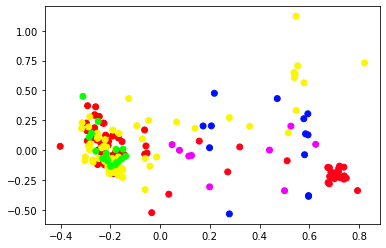

In [8]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='hsv')
plt.show()

In [9]:
print(sum(pca.explained_variance_ratio_))

0.8586697305102716


при n_components = 4

[[ 4.13560332e-01  4.05127229e-01  9.91335006e-01 ...  3.15113379e-01
   6.39064458e-03 -8.87821104e-03]
 [ 2.60258278e-01  4.20059042e-01  8.03878083e-01 ...  2.43815054e-01
   1.93211025e-02 -1.32425330e-02]
 [ 2.10728114e-01  4.17649388e-01  7.84256266e-01 ...  2.15681099e-01
   1.21664495e-02 -8.71190711e-05]
 ...
 [ 3.02867072e-01  5.35668189e-01 -3.58278663e-02 ...  3.54691809e-01
   3.32142653e-01 -2.03589677e-02]
 [ 2.24560124e-01  5.30192555e-01 -2.81019256e-02 ...  3.07515795e-01
   3.02184760e-01 -2.50996532e-02]
 [ 2.46086641e-01  5.39981995e-01 -3.37627086e-02 ...  3.10339068e-01
   3.35966543e-01 -1.55855374e-02]]
[[0.43283582 0.43759398 1.         ... 0.30855019 0.         0.        ]
 [0.28358209 0.47518797 0.80178174 ... 0.22304833 0.         0.        ]
 [0.22080773 0.42105263 0.79064588 ... 0.21840149 0.         0.        ]
 ...
 [0.41703248 0.54586466 0.         ... 0.27973978 0.52063492 0.        ]
 [0.23529412 0.54887218 0.         ... 0.28345725 0.4984127  0.    

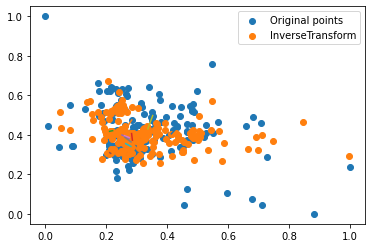

In [22]:
inversed =pca.inverse_transform(pca_data)
print(inversed)
print(data)
plt.scatter(data[:, 0], data[:, 1], label='Original points')
plt.scatter(inversed[:, 0], inversed[:, 1], label='InverseTransform')
[plt.plot([data[i, 0], inversed[i, 0]], [data[i, 1], inversed[i, 1]]) for i in range(10)]
plt.legend()
plt.show()

Исходные данные и данные, восстановленные с помощью inverse_transform(), различаются, так как преобразование покрывает чуть бльше 85% данных, следовательно, оставшиеся данные теряются

In [33]:
pca = PCA(n_components = 4, svd_solver="full")
pca_data = pca.fit(data).transform(data)
print(pca_data)
pca = PCA(n_components = 4, svd_solver="arpack")
pca_data = pca.fit(data).transform(data)
print(pca_data)
pca = PCA(n_components = 4, svd_solver="randomized")
pca_data = pca.fit(data).transform(data)
print(pca_data)

[[-4.02106406e-01  3.27066975e-02 -1.67050356e-01  1.92195203e-01]
 [-2.06319788e-01 -1.44705307e-01 -8.19230734e-02  2.05493779e-02]
 [-1.88617003e-01 -1.94853604e-01 -4.46961577e-02 -3.44663484e-02]
 [-2.37208477e-01 -9.70644677e-02 -8.63357190e-02  1.50685878e-02]
 [-2.23972190e-01 -1.21779151e-01 -8.73951860e-02 -5.32275854e-02]
 [-2.38343376e-01  6.01961887e-02  4.04603720e-01 -1.09362324e-01]
 [-2.25779812e-01 -1.07449689e-01 -1.00098305e-01 -6.05857463e-02]
 [-2.34800324e-01 -9.28817916e-02 -1.10631803e-01 -8.86689588e-02]
 [-1.96420004e-01 -6.89746231e-02 -1.07524570e-01  1.28297548e-01]
 [-2.26074680e-01 -3.65788388e-03  1.01949643e-01 -6.90299055e-02]
 [-2.09164891e-01  4.00937901e-02  3.68335095e-01 -1.49791528e-01]
 [-2.31471612e-01 -8.27551882e-02 -8.90323459e-02 -5.40371250e-02]
 [-2.12382788e-01  5.20902469e-02  3.48476614e-01 -1.63710873e-01]
 [-2.33643459e-01  5.60754213e-02  1.93160797e-01 -1.24595242e-01]
 [-2.15589511e-01 -9.27878222e-02 -8.16423819e-02 -9.69486394e

In [54]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=4, kernel='linear')
data_transformed = transformer.fit_transform(data)
#print(data_transformed)
transformer = KernelPCA(n_components=4, kernel='poly')
data_transformed = transformer.fit_transform(data)
#print(data_transformed)
transformer = KernelPCA(n_components=4, kernel='rbf')
data_transformed = transformer.fit_transform(data)
#print(data_transformed)
transformer = KernelPCA(n_components=4, kernel='sigmoid')
data_transformed = transformer.fit_transform(data)
#print(data_transformed)
transformer = KernelPCA(n_components=4, kernel='cosine')
data_transformed = transformer.fit_transform(data)
#print(data_transformed)
#transformer = KernelPCA(n_components=4, kernel='precomputed')
#data_transformed = transformer.fit_transform(data)
#print(data_transformed)

При параметре kernel='linear' KernelPCA и PCA имеют одинаковые результаты

In [60]:
from sklearn.decomposition import SparsePCA
transformer = SparsePCA(n_components=4, alpha=0.005)
data1_transformed = transformer.fit_transform(data)
print(data1_transformed)


[[ 4.19822648e-01  1.07733748e-01  1.22817355e-01 -1.16350002e-01]
 [ 2.19629522e-01 -8.39231310e-02  1.27283613e-01  2.91010584e-02]
 [ 1.98657444e-01 -1.43588435e-01  1.14084134e-01  7.99318308e-02]
 [ 2.42323627e-01 -3.95372393e-02  1.05790941e-01  3.52304987e-02]
 [ 2.18728219e-01 -5.78462671e-02  1.10891511e-01  1.01975761e-01]
 [ 2.13718339e-01 -1.34034415e-01 -4.04985154e-01  8.54733400e-02]
 [ 2.16810274e-01 -3.88796747e-02  1.13805559e-01  1.09689537e-01]
 [ 2.17738691e-01 -1.97483102e-02  1.11750370e-01  1.38219074e-01]
 [ 2.21684051e-01 -1.03158494e-02  1.27057730e-01 -8.00572586e-02]
 [ 2.08717881e-01 -4.55474351e-02 -1.09627514e-01  8.56010845e-02]
 [ 1.78598547e-01 -1.32823275e-01 -3.67283092e-01  1.26823957e-01]
 [ 2.20910397e-01 -2.28749398e-02  9.33512158e-02  1.00846681e-01]
 [ 1.76805334e-01 -1.12129617e-01 -3.58175531e-01  1.42103496e-01]
 [ 2.00191026e-01 -3.50124840e-02 -2.23783886e-01  1.24881784e-01]
 [ 1.98303196e-01 -3.36170638e-02  8.77195869e-02  1.40394379e

In [63]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=4)
data2_transformed = transformer.fit_transform(data)
print(data2_transformed)

[[-1.05945461e+00 -9.04535554e-01  7.86993489e-01 -6.88147770e-01]
 [-7.59208244e-01  4.50563693e-01  3.05269440e-01 -5.17390612e-01]
 [-7.48415298e-01  5.53277453e-01 -1.49543227e-01 -1.63647627e-01]
 [-7.40425472e-01 -1.24533126e-02 -6.11212134e-02  1.60716222e-01]
 [-7.21531551e-01  3.64081015e-01 -4.73947630e-01 -1.49389490e-01]
 [-7.36522682e-01  1.92413526e-01 -6.25051016e-01  6.20163374e-01]
 [-6.84896171e-01  3.31818925e-01 -4.89264413e-01 -2.59290386e-01]
 [-6.73522573e-01  3.38813034e-01 -7.50657255e-01 -2.38774376e-01]
 [-6.48396493e-01 -1.13556265e-01  9.63012504e-01 -5.19148854e-01]
 [-6.41737391e-01  8.47934985e-02 -6.07694969e-01  7.16627660e-02]
 [-6.44552421e-01  3.41362283e-01 -8.86056759e-01  6.12319621e-01]
 [-6.41718208e-01 -5.42995458e-02 -7.90515206e-01  1.67745515e-01]
 [-6.29956611e-01  4.54122995e-01 -8.66363799e-01  3.73580484e-01]
 [-6.22501883e-01  1.95422957e-01 -9.06892561e-01  1.20126160e-01]
 [-6.15316211e-01  1.08165369e-01 -1.16497099e+00  2.87773697e

PCA тесно связан с дисперсией, а факторный анализ с корелляцией между признаками